# Στοιχεία ομάδας

Ομάδα:Α18
Ονοματεπώνυμα: Καρακάσης Χρυσόστομος(03113136), Γουρουνάς Δημήτρης(03113060)

# Περιγραφή του dataset

Το dataset αυτό περιλαμβάνει 1080 έγγραφα κείμενα εργασιακής περιγραφής Βραζιλιάνικων εταιριών κατηγοριοποιημένων σε 9 κατηγορίες. Τα κείμενα είχαν προεπεξεργαστεί έτσι ώστε να κρατηθούν μόνο οι "χρήσιμες" και με νόημα λέξεις και κατόπιν μετατράπηκαν στην κανονική τους μορφή. Έτσι κάθε μια από τις 856 στήλες αναπαριστά τη συχνότητα εμφάνισης της κάθε μιας απο τις 856 λέξεις στο αντίστοιχο κείμενο (1 σημαίνει οτι εμφανίζεται στο κείμενο και 0 όχι). Η πρώτη στήλη του πίνακα παίρνει τιμές από 1 έως 9 και υποδεικνύει την κατηγορία στην οποία ανήκει το κείμενο .Έτσι έχουμε 857 στήλες σύνολο. Δεν υπάρχουν απουσιάζουσες τιμές. Επίσης το dataset είναι ισορροπημένο, καθώς όλα τα classes έχουν ίδιο πλήθος δειγμάτων.

In [1]:
!pip install --upgrade sklearn
!pip install --upgrade pandas
!pip install  scikit-learn #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install --upgrade imblearn
!pip install --upgrade imbalanced-learn

Requirement already up-to-date: sklearn in /home/nbcommon/anaconda2_501/lib/python2.7/site-packages
    100% |################################| 12.2MB 78kB/s  eta 0:00:01
  Found existing installation: scikit-learn 0.18.1
    DEPRECATION: Uninstalling a distutils installed project (scikit-learn) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    Uninstalling scikit-learn-0.18.1:
      Successfully uninstalled scikit-learn-0.18.1
    100% |################################| 24.3MB 44kB/s  eta 0:00:01
    100% |################################| 512kB 2.5MB/s eta 0:00:01
Requirement already up-to-date: numpy>=1.9.0 in /home/nbcommon/anaconda2_501/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: python-dateutil in /home/nbcommon/anaconda2_501/lib/python2.7/site-packages (from pandas)
Requirement already up-to-date: six>=1.5 in /home/nbcommon/anacond

In [2]:
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import requests
import json
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from scipy import stats as st
import time
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn import neighbors

In [3]:
import csv
f = open('CNAE-9.data', 'rb')
reader = csv.reader(f)
first_doc = reader.next() #an kanoyme apla pd.read_csv xanoyme tin prwti grammi dedomenwn
#print first_doc          #etsi lambanoyme tin prwti grammi
first_doc_ar=np.asarray(first_doc)#metatrepoyme ti lista se pinaka
Data = pd.read_csv('CNAE-9.data').values 
docs=np.insert(Data,0,first_doc_ar,axis=0)
print docs.shape
print docs
labels=docs[:,0]
print labels
features=np.delete(docs,0,axis=1) #features einai ta telika pure data
print features
#tha doume tis suxnotites tws klasewn
print "frequencies:", np.bincount(labels)
train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.3)#30% test 
print test


(1080, 857)
[[1 0 0 ..., 0 0 0]
 [2 0 0 ..., 0 0 0]
 [3 0 0 ..., 0 0 0]
 ..., 
 [7 0 0 ..., 0 0 0]
 [8 0 0 ..., 0 0 0]
 [9 0 0 ..., 0 0 0]]
[1 2 3 ..., 7 8 9]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
frequencies: [  0 120 120 120 120 120 120 120 120 120]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


Στα frequencies βλέπουμε ότι κάθε κλάση έχει ακριβώς 120 δείγματα, άρα είναι πλήρων ισορροπημένο το dataset.

# Baseline Classification

Αρχικά, εκπαιδεύουμε στο train τους classifiers με default τιμές 

In [4]:
#dummy classifiers
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_constant_2 = DummyClassifier(strategy="constant", constant=2)
dc_constant_3 = DummyClassifier(strategy="constant", constant=3)
dc_constant_4 = DummyClassifier(strategy="constant", constant=4)
dc_constant_5 = DummyClassifier(strategy="constant", constant=5)
dc_constant_6 = DummyClassifier(strategy="constant", constant=6)
dc_constant_7 = DummyClassifier(strategy="constant", constant=7)
dc_constant_8 = DummyClassifier(strategy="constant", constant=8)
dc_constant_9 = DummyClassifier(strategy="constant", constant=9)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")
cnae_accuracy = {}
preds=[0]*15
#preds=[]

In [5]:
model = dc_uniform.fit(train, train_labels)
preds[0] = dc_uniform.predict(test)
cnae_accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)

model = dc_constant_1.fit(train, train_labels)
preds[1] = dc_constant_1.predict(test)
cnae_accuracy['constant 1'] = dc_constant_1.score(test, test_labels)

model = dc_constant_2.fit(train, train_labels)
preds[2] = dc_constant_2.predict(test)
cnae_accuracy['constant 2'] = dc_constant_2.score(test, test_labels)

model = dc_constant_3.fit(train, train_labels)
preds[3] = dc_constant_3.predict(test)
cnae_accuracy['constant 3'] = dc_constant_3.score(test, test_labels)

model = dc_constant_4.fit(train, train_labels)
preds[4] = dc_constant_4.predict(test)
cnae_accuracy['constant 4'] = dc_constant_4.score(test, test_labels)

model = dc_constant_5.fit(train, train_labels)
preds[5] = dc_constant_5.predict(test)
cnae_accuracy['constant 5'] = dc_constant_5.score(test, test_labels)

model = dc_constant_6.fit(train, train_labels)
preds[6] = dc_constant_6.predict(test)
cnae_accuracy['constant 6'] = dc_constant_6.score(test, test_labels)

model = dc_constant_7.fit(train, train_labels)
preds[7] = dc_constant_7.predict(test)
cnae_accuracy['constant 7'] = dc_constant_7.score(test, test_labels)

model = dc_constant_8.fit(train, train_labels)
preds[8] = dc_constant_8.predict(test)
cnae_accuracy['constant 8'] = dc_constant_8.score(test, test_labels)

model = dc_constant_9.fit(train, train_labels)
preds[9] = dc_constant_9.predict(test)
cnae_accuracy['constant 9'] = dc_constant_9.score(test, test_labels)

model = dc_most_frequent.fit(train, train_labels)
preds[10] = dc_most_frequent.predict(test)
cnae_accuracy['most frequent label'] = dc_most_frequent.score(test, test_labels)

model = dc_stratified.fit(train, train_labels)
preds[11] = dc_stratified.predict(test)
cnae_accuracy['stratified'] = dc_stratified.score(test, test_labels)

In [7]:
# Gaussian Naive-Bayes
gnb = GaussianNB()
# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
model = gnb.fit(train, train_labels)
preds[12]=gnb.predict(test)
# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy. Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
cnae_accuracy['gaussian'] = gnb.score(test, test_labels)
# και ξανατυπώνουμε τα sorted αποτελέσματ

In [45]:
#knn
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(train, train_labels)
preds[13] = knn.predict(test)
cnae_accuracy['knn'] = knn.score(test, test_labels)

In [9]:
#MLP
clf = MLPClassifier(solver='adam', alpha=1e-4,
                    hidden_layer_sizes=(100,) , max_iter = 200,activation = 'relu',learning_rate = 'constant',random_state=1)
model=clf.fit(train, train_labels)
preds[14] = clf.predict(test)
cnae_accuracy['MLP'] = clf.score(test, test_labels)

In [46]:
print "Classification Accuracy on the CNAE-9 Dataset (30% test set)\n"
for key, value in sorted(cnae_accuracy.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s" % (key, value)

Classification Accuracy on the CNAE-9 Dataset (30% test set)

MLP: 0.966049382716
gaussian: 0.91975308642
knn: 0.845679012346
constant 8: 0.138888888889
stratified: 0.126543209877
constant 6: 0.123456790123
constant 4: 0.117283950617
constant 5: 0.117283950617
constant 7: 0.111111111111
uniform (random): 0.104938271605
constant 1: 0.101851851852
constant 3: 0.0987654320988
constant 9: 0.0987654320988
constant 2: 0.0925925925926
most frequent label: 0.0925925925926


Παρατηρούμε ότι όλες οι constant αποτυγχάνουν, λογικό αφού τώρα έχουμε 9 κλάσεις (εν αντιθέσει με το μικρό dataset που είχαμε μόνο 2) και ειναι πλήρως ισορροπημένο το dataset. Μάλιστα βλέπουμε ότι έχουν accuracy περίπου ίσο με 1/9 όλες τους, όπως ήταν αναμενόμενο. Προφανώς οι knn, gaussian,MLP δίνουν μακράν καλύτερα αποτελέσματα.

Confusion Matrix,F1-macro,F1-weighted average

In [47]:
#models = [dc_uniform ,dc_constant_1,dc_constant_2 ,dc_most_frequent ,dc_stratified]
model_names = ["uniform" ,"constant_1","constant_2" ,"constant_3","constant_4","constant_5","constant_6","constant_7","constant_8","constant_9","most_frequent" ,"stratified","gaussian","knn","MLP"]
# Compute confusion matrixes
macro=[0]*15
weighted=[0]*15
print "Class is from 1 to 9"
for i in range(15):
    cnf_matrix = confusion_matrix(test_labels, preds[i])
    print "----------------------------------------------------------------------"
    print "For model:",model_names[i],"\n",cnf_matrix,"\n"
    # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις έχουν το ίδιο βάρος (average = macro)
    macro[i]=precision_recall_fscore_support(test_labels, preds[i], average='macro')
    print "Precision,recall and F1 for average=macro","\n", macro[i], "\n"
    # εκτυπώνουμε το μέσο όρο των precision, recall και F1 θεωρόντας ότι οι κλάσεις δεν έχουν το ίδιο βάρος (average = weighted)
    weighted[i]=precision_recall_fscore_support(test_labels, preds[i], average='weighted')
    print "Precision,recall and F1 for average=weighted","\n",precision_recall_fscore_support(test_labels, preds[i], average='weighted'), "\n"

Class is from 1 to 9
----------------------------------------------------------------------
For model: uniform 
[[6 4 3 2 2 5 2 2 7]
 [4 2 4 3 6 3 4 4 0]
 [4 2 4 3 6 4 2 6 1]
 [5 3 3 6 3 3 9 3 3]
 [4 3 6 5 6 5 3 2 4]
 [2 5 5 4 5 5 2 8 4]
 [8 3 3 2 5 3 5 6 1]
 [4 3 2 2 6 7 9 8 4]
 [2 2 3 2 5 3 4 4 7]] 

Precision,recall and F1 for average=macro 
(0.15120271642548386, 0.14996566542619172, 0.1499099387756232, None) 

Precision,recall and F1 for average=weighted 
(0.15303357313232765, 0.15123456790123457, 0.15144644130173979, None) 

----------------------------------------------------------------------
For model: constant_1 
[[33  0  0  0  0  0  0  0  0]
 [30  0  0  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0  0]
 [38  0  0  0  0  0  0  0  0]
 [38  0  0  0  0  0  0  0  0]
 [40  0  0  0  0  0  0  0  0]
 [36  0  0  0  0  0  0  0  0]
 [45  0  0  0  0  0  0  0  0]
 [32  0  0  0  0  0  0  0  0]] 

Precision,recall and F1 for average=macro 
(0.011316872427983538, 0.1111111111111111, 0.020541549

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


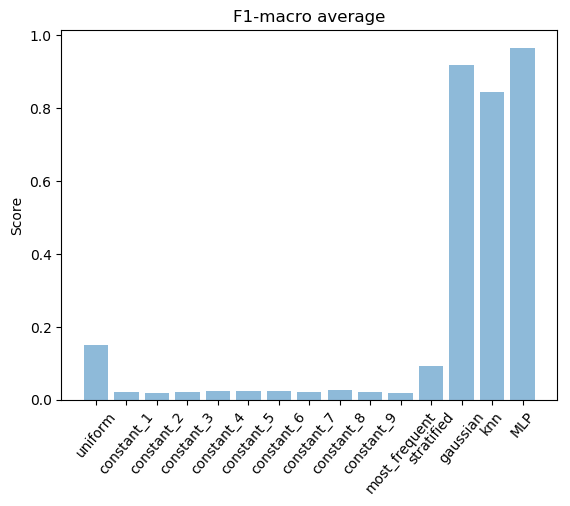

In [48]:
y_pos = np.arange(len(model_names))
print y_pos
performancemacrodefault = [macro[0][2] ,macro[1][2],macro[2][2],macro[3][2],macro[4][2],macro[5][2],macro[6][2],macro[7][2],macro[8][2],macro[9][2],macro[10][2],macro[11][2],macro[12][2],macro[13][2],macro[14][2]]
plt.bar(y_pos, performancemacrodefault, align='center', alpha=0.5)
plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1-macro average')
plt.show()

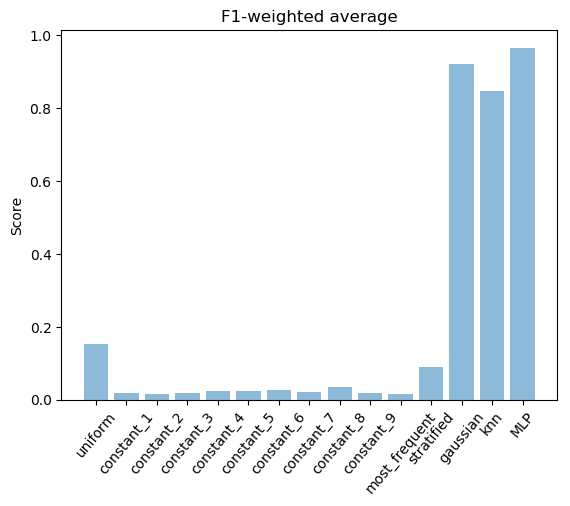

In [50]:
performanceweighted = [weighted[0][2] ,weighted[1][2],weighted[2][2],weighted[3][2],weighted[4][2],weighted[5][2],weighted[6][2],weighted[7][2],weighted[8][2],weighted[9][2],weighted[10][2],weighted[11][2],weighted[12][2],weighted[13][2],weighted[14][2]]
plt.bar(y_pos, performanceweighted, align='center', alpha=0.5)
plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1-weighted average')
plt.show()

# Pipeline

In [14]:
#Dummy Classifiers

selector = VarianceThreshold()
#scaler = StandardScaler() #den xreiazetai afou ta deigmata mas einai 0 kai 1
#ros = RandomOverSampler() #isoplithi labels
pca = PCA()
vthreshold = [0, 0.01, 0.02]
n_components = [20, 30, 40, 50, 60]
#clf = neighbors.KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
predsmacro=[0]*15
predsweighted=[0]*15
performmacro=[0]*15
performweighted=[0]*15


 Παρατηρούμε ότι για vthreshold>=0.1 μειώνεται πάρα πολύ η διάσταση των δεδομένων,σε σημείο που ο αριθμός των features γίνεται μικρότερος από 20. Αυτό γιατί τα χαρακτηριστικά παίρνουν μόνο την τιμή 0 ή 1, και το 99% αυτών ειναι 0. Έτσι η διακύμανση των χαρακτηριστικών είναι πάρα πολύ μικρή, αλλά έστω και μικρή χρήσιμη για την κατηγοριοποίηση των κειμένων. Έτσι δοκιμάσαμε μια τάξη μεγέθους μικρότερο να ειναι το VarianceThreshold.

Κάνουμε pipeline και gridsearchcv για όλους τους classifiers εκτός του knn και MLP,για τους οποίους πρέπει να βάλουμε και τις υπερπαραμέτρους.

In [15]:
models=[dc_uniform,dc_constant_1,dc_constant_2,dc_constant_3,dc_constant_4,dc_constant_5,dc_constant_6,dc_constant_7,dc_constant_8
        ,dc_constant_9,dc_most_frequent,dc_stratified,gnb,knn,clf]
#print len(models)

#print model_names.shape
for i in range(0,13):
    #print models[i],model_names[i]
    pipe = Pipeline(steps=[('selector', selector),('pca', pca), (model_names[i], models[i])],memory = 'tmp')
    #f1-macro
    estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), scoring='f1_macro',cv=5,n_jobs=-1)
    
    start_time = time.time()
    estimator.fit(train, train_labels)
    print "Fit time, for",model_names[i],"is",(time.time() - start_time),"seconds macro optimal parameteres"
    
    start_time = time.time()
    predsmacro[i] = estimator.predict(test)
    print "Predict time, for",model_names[i],"is",(time.time() - start_time),"seconds macro optimal parameteres"
    
    temp=precision_recall_fscore_support(test_labels, predsmacro[i], average='macro')
    performmacro[i]=temp[2]
    print classification_report(test_labels, predsmacro[i])
    print estimator.best_estimator_
    print "---------------------------------------------------------------------------------------------------------------------"
    #f1-weighted
    estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), scoring='f1_weighted',cv=5,n_jobs=-1)
    
    start_time = time.time()
    estimator.fit(train, train_labels)
    print "Fit time, for",model_names[i],"is",(time.time() - start_time),"seconds weighted optimal parameteres"
    
    start_time = time.time()
    predsweighted[i] = estimator.predict(test)
    print "Train time, for",model_names[i],"is",(time.time() - start_time),"seconds weighted optimal parameteres"
    
    temp=precision_recall_fscore_support(test_labels, predsweighted[i], average='weighted')
    performweighted[i]=temp[2]
    print classification_report(test_labels, predsweighted[i])
    print estimator.best_estimator_
    print "---------------------------------------------------------------------------------------------------------------------"

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/imblearn/pipeline.py:201: UserWarning: Persisting input arguments took 0.53s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/imblearn/pipeline.py:201: UserWarning: Persisting input arguments took 0.80s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_ste

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/imblearn/pipeline.py:201: UserWarning: Persisting input arguments took 1.01s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/imblearn/pipeline.py:201: UserWarning: Persisting input arguments took 0.59s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_ste

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/imblearn/pipeline.py:201: UserWarning: Persisting input arguments took 0.92s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/imblearn/pipeline.py:201: UserWarning: Persisting input arguments took 0.75s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_ste

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/imblearn/pipeline.py:201: UserWarning: Persisting input arguments took 0.94s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_steps[name])
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/imblearn/pipeline.py:201: UserWarning: Persisting input arguments took 1.00s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  **fit_params_ste

Fit time, for uniform is 80.0761671066 seconds macro optimal parameteres
Predict time, for uniform is 0.000788927078247 seconds macro optimal parameteres
             precision    recall  f1-score   support

          1       0.10      0.09      0.09        33
          2       0.06      0.07      0.06        30
          3       0.07      0.09      0.08        32
          4       0.00      0.00      0.00        38
          5       0.09      0.08      0.09        38
          6       0.08      0.07      0.08        40
          7       0.05      0.06      0.05        36
          8       0.15      0.13      0.14        45
          9       0.16      0.19      0.17        32

avg / total       0.09      0.09      0.09       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.02)), ('pca', PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('uniform', DummyClassifier(constant=None, rando

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_1 is 37.2279160023 seconds macro optimal parameteres
Predict time, for constant_1 is 0.0029559135437 seconds macro optimal parameteres
             precision    recall  f1-score   support

          1       0.10      1.00      0.18        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.10      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_1', DummyClassifier(constant=1, rand

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_1 is 30.5660359859 seconds weighted optimal parameteres
Train time, for constant_1 is 0.00296592712402 seconds weighted optimal parameteres
             precision    recall  f1-score   support

          1       0.10      1.00      0.18        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.10      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_1', DummyClassifier(constant=1,

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_2 is 35.3128080368 seconds macro optimal parameteres
Predict time, for constant_2 is 0.00292301177979 seconds macro optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.09      1.00      0.17        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.09      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_2', DummyClassifier(constant=2, ran

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_2 is 33.968765974 seconds weighted optimal parameteres
Train time, for constant_2 is 0.00262713432312 seconds weighted optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.09      1.00      0.17        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.09      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_2', DummyClassifier(constant=2, 

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_3 is 33.4252529144 seconds macro optimal parameteres
Predict time, for constant_3 is 0.00282716751099 seconds macro optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.10      1.00      0.18        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.10      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_3', DummyClassifier(constant=3, ran

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_3 is 40.7494869232 seconds weighted optimal parameteres
Train time, for constant_3 is 0.00285720825195 seconds weighted optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.10      1.00      0.18        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.10      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_3', DummyClassifier(constant=3,

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_4 is 39.9135839939 seconds macro optimal parameteres
Predict time, for constant_4 is 0.00301814079285 seconds macro optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.12      1.00      0.21        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.12      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_4', DummyClassifier(constant=4, ran

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_4 is 32.7729041576 seconds weighted optimal parameteres
Train time, for constant_4 is 0.00280404090881 seconds weighted optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.12      1.00      0.21        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.12      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_4', DummyClassifier(constant=4,

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_5 is 30.4906430244 seconds macro optimal parameteres
Predict time, for constant_5 is 0.00312089920044 seconds macro optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.12      1.00      0.21        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.12      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_5', DummyClassifier(constant=5, ran

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_5 is 32.7227659225 seconds weighted optimal parameteres
Train time, for constant_5 is 0.00335192680359 seconds weighted optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.12      1.00      0.21        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.12      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_5', DummyClassifier(constant=5,

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_6 is 34.855214119 seconds macro optimal parameteres
Predict time, for constant_6 is 0.0030369758606 seconds macro optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.12      1.00      0.22        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.02      0.12      0.03       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_6', DummyClassifier(constant=6, rando

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_6 is 33.4811861515 seconds weighted optimal parameteres
Train time, for constant_6 is 0.00268697738647 seconds weighted optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.12      1.00      0.22        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.02      0.12      0.03       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_6', DummyClassifier(constant=6,

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_7 is 33.5658490658 seconds macro optimal parameteres
Predict time, for constant_7 is 0.00347590446472 seconds macro optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.11      1.00      0.20        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.11      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_7', DummyClassifier(constant=7, ran

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_7 is 33.7910459042 seconds weighted optimal parameteres
Train time, for constant_7 is 0.00530099868774 seconds weighted optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.11      1.00      0.20        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.11      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_7', DummyClassifier(constant=7,

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_8 is 35.6891069412 seconds macro optimal parameteres
Predict time, for constant_8 is 0.00331020355225 seconds macro optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.14      1.00      0.24        45
          9       0.00      0.00      0.00        32

avg / total       0.02      0.14      0.03       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_8', DummyClassifier(constant=8, ran

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_8 is 37.4384229183 seconds weighted optimal parameteres
Train time, for constant_8 is 0.00309991836548 seconds weighted optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.14      1.00      0.24        45
          9       0.00      0.00      0.00        32

avg / total       0.02      0.14      0.03       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_8', DummyClassifier(constant=8,

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_9 is 36.6643788815 seconds macro optimal parameteres
Predict time, for constant_9 is 0.00300002098083 seconds macro optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.10      1.00      0.18        32

avg / total       0.01      0.10      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_9', DummyClassifier(constant=9, ran

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for constant_9 is 35.9722919464 seconds weighted optimal parameteres
Train time, for constant_9 is 0.00266909599304 seconds weighted optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.00      0.00      0.00        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.10      1.00      0.18        32

avg / total       0.01      0.10      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('constant_9', DummyClassifier(constant=9,

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for most_frequent is 45.7101910114 seconds macro optimal parameteres
Predict time, for most_frequent is 0.00292301177979 seconds macro optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.09      1.00      0.17        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.09      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('most_frequent', DummyClassifier(consta

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nbuser

Fit time, for most_frequent is 42.9500961304 seconds weighted optimal parameteres
Train time, for most_frequent is 0.00273394584656 seconds weighted optimal parameteres
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        33
          2       0.09      1.00      0.17        30
          3       0.00      0.00      0.00        32
          4       0.00      0.00      0.00        38
          5       0.00      0.00      0.00        38
          6       0.00      0.00      0.00        40
          7       0.00      0.00      0.00        36
          8       0.00      0.00      0.00        45
          9       0.00      0.00      0.00        32

avg / total       0.01      0.09      0.02       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('most_frequent', DummyClassifier(co

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


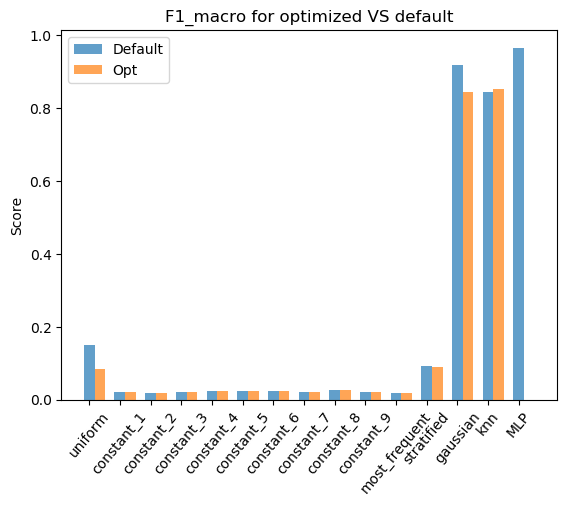

In [51]:
y_pos = np.arange(len(model_names))
print y_pos
bar_width = 0.35
#macromlp_opt=precision_recall_fscore_support(test_labels, predsmlp_opt, average='macro')
#performancefinalmac=performancemacroopt+[macromlp_opt[2]]
plt.bar(y_pos, performancemacrodefault,bar_width, align='center', alpha=0.7,label='Default')
plt.bar(y_pos+bar_width, performmacro,bar_width, align='center', alpha=0.7,label='Opt')

plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1_macro for optimized VS default')
plt.legend()
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


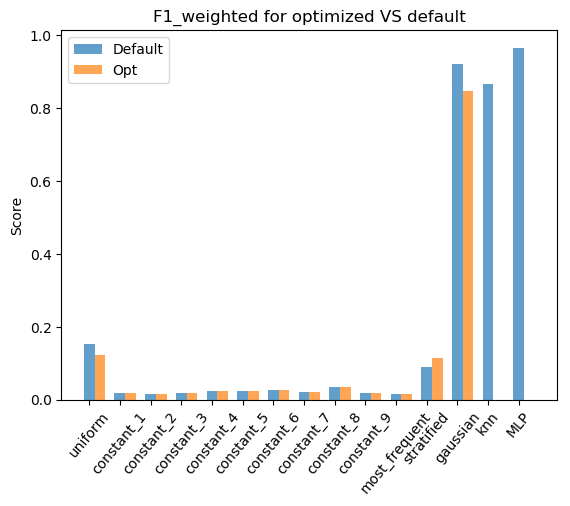

In [17]:
y_pos = np.arange(len(model_names))
print y_pos
bar_width = 0.35
#macromlp_opt=precision_recall_fscore_support(test_labels, predsmlp_opt, average='macro')
#performancefinalmac=performancemacroopt+[macromlp_opt[2]]
plt.bar(y_pos, performanceweighted,bar_width, align='center', alpha=0.7,label='Default')
plt.bar(y_pos+bar_width, performweighted,bar_width, align='center', alpha=0.7,label='Opt')

plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1_weighted for optimized VS default')
plt.legend()
plt.show()

Όπως είχαμε παρατηρήσει και στο πρώτο notebook ,η προεπεξεργασία των δεδομένων δε μεταβάλει την απόδοση των constant dummies.
Παρατηρούμε μια μικρή μεταβολή στους uniform και stratified για τον ίδιο λόγο που χαμε εξηγήσει και στο πρώτο notebook.

# Τώρα θα κάνουμε το gridsearch για knn και MLP που έχουν υπερπαραμέτρους


In [18]:
print model_names[13]
print models[13]

knn
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [19]:
#knn
#kNN: n_neighbors, metric, weights #uperparametroi ws pros beltistopoihsh
k = [5, 10, 20]
weights=['uniform','distance']
#metric=['minkowski','euclidean','manhattan','chebyshev','wminkowski','seuclidean','mahalanobis'] #oles oi dunates times tou metric
metric=['euclidean','manhattan','chebyshev']
knn = KNeighborsClassifier()

pipe = Pipeline(steps=[('selector', selector),('pca', pca),('kNN', knn)],memory = 'tmp')
#f1-macro
estimatorknn1 = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k,kNN__weights = weights,kNN__metric = metric), scoring='f1_macro',cv=5,refit='f1_macro',n_jobs=-1)
start_time = time.time()
estimatorknn1.fit(train, train_labels)
print("Fit time for kNN and macro optimal parameteres: %s seconds" % (time.time() - start_time))
start_time = time.time()
predsmacro[13] = estimatorknn1.predict(test)
print("Predict time for kNN and macro optimal parameters: %s seconds" % (time.time() - start_time))
temp=precision_recall_fscore_support(test_labels, predsmacro[13], average='macro')
performmacro[13]=temp[2]
print classification_report(test_labels, predsmacro[13])
print estimatorknn1.best_estimator_
print "---------------------------------------------------------------------------------------------------------------------"
#f1-weighted
estimatorknn2 = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k,kNN__weights=weights,kNN__metric=metric), scoring='f1_weighted',cv=5,refit='f1_weighted',n_jobs=-1)
start_time = time.time()
estimatorknn2.fit(train, train_labels)
print("Fit time for kNN and weighted optimal parameteres: %s seconds" % (time.time() - start_time))
start_time = time.time()
predsweighted[13] = estimatorknn2.predict(test)
print("Predict time for kNN and weighted optimal parameters: %s seconds" % (time.time() - start_time))
temp=precision_recall_fscore_support(test_labels, predsweighted[13], average='weighted')
performweighted[13]=temp[2]
print classification_report(test_labels, predsweighted[13])
print estimatorknn2.best_estimator_
print "---------------------------------------------------------------------------------------------------------------------"

Fit time for kNN and macro optimal parameteres: 788.966869831 seconds
Predict time for kNN and macro optimal parameters: 0.0313358306885 seconds
             precision    recall  f1-score   support

          1       0.77      1.00      0.87        33
          2       1.00      0.93      0.97        30
          3       0.94      0.91      0.92        32
          4       0.88      0.61      0.72        38
          5       1.00      0.82      0.90        38
          6       0.56      0.88      0.68        40
          7       0.97      0.92      0.94        36
          8       1.00      0.98      0.99        45
          9       0.79      0.59      0.68        32

avg / total       0.88      0.85      0.85       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30,

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


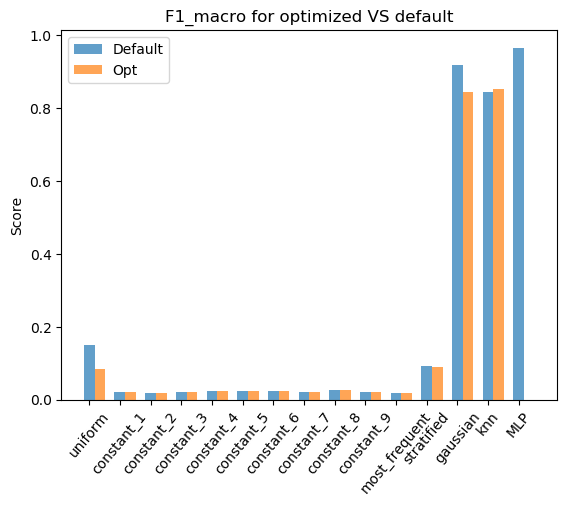

In [52]:
y_pos = np.arange(len(model_names))
print y_pos
bar_width = 0.35
#macromlp_opt=precision_recall_fscore_support(test_labels, predsmlp_opt, average='macro')
#performancefinalmac=performancemacroopt+[macromlp_opt[2]]
plt.bar(y_pos, performancemacrodefault,bar_width, align='center', alpha=0.7,label='Default')
plt.bar(y_pos+bar_width, performmacro,bar_width, align='center', alpha=0.7,label='Opt')

plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1_macro for optimized VS default')
plt.legend()
plt.show()


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


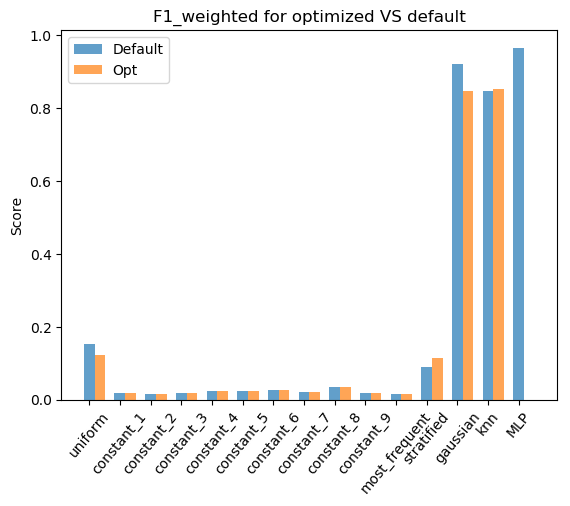

In [53]:
y_pos = np.arange(len(model_names))
print y_pos
bar_width = 0.35
#macromlp_opt=precision_recall_fscore_support(test_labels, predsmlp_opt, average='macro')
#performancefinalmac=performancemacroopt+[macromlp_opt[2]]
plt.bar(y_pos, performanceweighted,bar_width, align='center', alpha=0.7,label='Default')
plt.bar(y_pos+bar_width, performweighted,bar_width, align='center', alpha=0.7,label='Opt')

plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1_weighted for optimized VS default')
plt.legend()
plt.show()

In [151]:
#MLP
#MLP: hidden_layer_sizes,activation, solver, max_iter, learning_rate, alpha 
#uperparametroi ws pros beltistopoihsh
solver_values= ['lbfgs', 'sgd', 'adam']
alpha_values = [0.00005, 0.0001,0.0002, 0.0003]
hidden_layer_sizes_values = [50,100, 150, 200]
max_iter_values = [100, 150, 200, 300]
activation_values = ['identity', 'logistic', 'tanh', 'relu']
learning_rate_values = ['constant', 'invscaling', 'adaptive']
clf = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector),('pca', pca),('mlp', clf)],memory = 'tmp')
#f1-macro
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, mlp__solver=solver_values,mlp__alpha=alpha_values,mlp__hidden_layer_sizes = hidden_layer_sizes_values,mlp__max_iter=max_iter_values,mlp__activation=activation_values,mlp__learning_rate=learning_rate_values), scoring='f1_macro',cv=5,refit='f1_macro',n_jobs=-1)
estimator.fit(train, train_labels)
predsmacro[14] = estimator.predict(test)
temp=precision_recall_fscore_support(test_labels, predsmacro[14], average='macro')
performmacro[14]=temp[2]
print classification_report(test_labels, predsmacro[14])
print estimator.best_estimator_
print "---------------------------------------------------------------------------------------------------------------------"
#f1-weighted
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, mlp__solver=solver_values,mlp__alpha=alpha_values,mlp__hidden_layer_sizes = hidden_layer_sizes_values,mlp__max_iter=max_iter_values,mlp__activation=activation_values,mlp__learning_rate=learning_rate_values), scoring='f1_weighted',cv=5,refit='f1_weighted',n_jobs=-1)
estimator.fit(train, train_labels)
predsweighted[14] = estimator.predict(test)
temp=precision_recall_fscore_support(test_labels, predsweighted[14], average='weighted')
performweighted[14]=temp[2]
print classification_report(test_labels, predsweighted[14])
print estimator.best_estimator_
print "---------------------------------------------------------------------------------------------------------------------"

             precision    recall  f1-score   support

          1       0.86      1.00      0.92        37
          2       1.00      0.97      0.99        35
          3       0.95      0.97      0.96        38
          4       0.74      0.88      0.81        26
          5       1.00      1.00      1.00        38
          6       1.00      0.74      0.85        42
          7       0.97      0.92      0.95        38
          8       0.93      1.00      0.96        38
          9       0.84      0.81      0.83        32

avg / total       0.93      0.92      0.92       324

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('pca', PCA(copy=True, iterated_power='auto', n_components=60, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('mlp', MLPClassifier(activation='relu', alpha=0.0002, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stoppi...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, wa

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


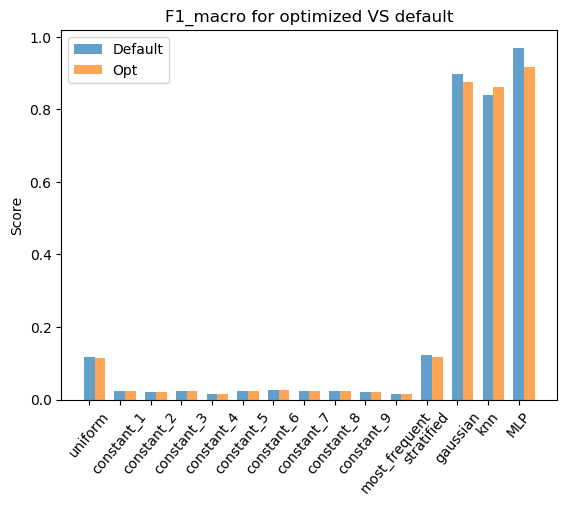

In [152]:
y_pos = np.arange(len(model_names))
print y_pos
bar_width = 0.35
#macromlp_opt=precision_recall_fscore_support(test_labels, predsmlp_opt, average='macro')
#performancefinalmac=performancemacroopt+[macromlp_opt[2]]
plt.bar(y_pos, performancemacrodefault,bar_width, align='center', alpha=0.7,label='Default')
plt.bar(y_pos+bar_width, performmacro,bar_width, align='center', alpha=0.7,label='Opt')

plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1_macro for optimized VS default')
plt.legend()
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


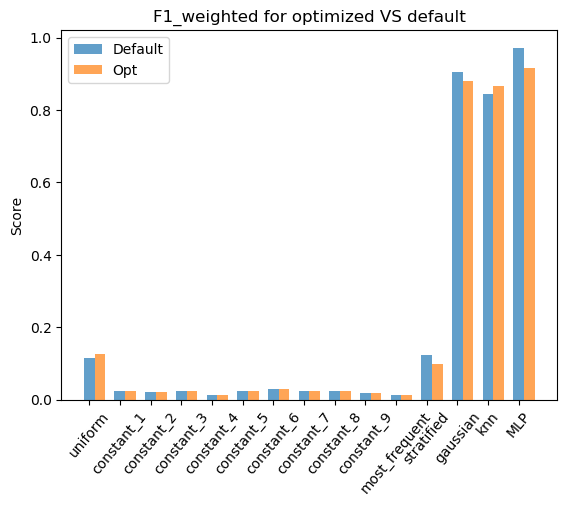

In [153]:
y_pos = np.arange(len(model_names))
print y_pos
bar_width = 0.35
#macromlp_opt=precision_recall_fscore_support(test_labels, predsmlp_opt, average='macro')
#performancefinalmac=performancemacroopt+[macromlp_opt[2]]
plt.bar(y_pos, performanceweighted,bar_width, align='center', alpha=0.7,label='Default')
plt.bar(y_pos+bar_width, performweighted,bar_width, align='center', alpha=0.7,label='Opt')

plt.xticks(y_pos, model_names,rotation=50)
plt.ylabel('Score')
plt.title('F1_weighted for optimized VS default')
plt.legend()
plt.show()

# Τελικά Συμπεράσματα

Γενικά παρατηρούμε ότι το Optimization που κάναμε δε βελτίωσε την απόδοση των classifiers MLP,gaussian. Και ο kNN δε βελτιώθηκε αισθητά επίσης (ενδεχομένως για διαφορετική default τιμή να χε καλύτερα αποτελέσματα). Αυτό οφείλεται ενδεχομένως σε μη ιδανικές τιμές στο varianceThreshold και pca, καθώς με τα κομμάτια αυτά της προεπεξεργασίας χάθηκε αρκετή χρήσιμη πληροφορία για το train. Ιδανικά θα έπρεπε να δοκιμαστεί και για διαφορετικές τιμές αυτών των παραμέτρων, αλλά λόγω μεγάλου χρόνου εκτέλεσης του κώδικα δεν απέμεινε χρόνος για περαιτέρω διερεύνηση.